In [1]:
import sys
import time
import json
import requests
import warnings
import importlib
import numpy as np
import pandas as pd
import pickle as pkl
import pandas as pd
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import matplotlib.pyplot as plt

import h3
import h3pandas

import src
from src.reload import deep_reload

In [2]:
'''
generating demographic data GeoDataFrame for Colorado using src.pull_data
 - this writes a .pkl in Data/Generated_Data
 - can also be called from the command line
'''
deep_reload(src)
src.pull_data.PullData(state_FIPS='08',path_to_data='')

Loading in the shells .csv: 0.0364 seconds
Pulling race data: 1.9829 seconds
Pulling housing type and tenure data: 1.8623 seconds
Pulling median income data: 1.0897 seconds
Loading in census tract geometry data: 8.3448 seconds
Sorting the DataFrames: 0.0039 seconds
Joining the DataFrames: 0.0037 seconds
Pickling: 0.0127 seconds
Done


In [32]:
#Loading in the demographic data generated using src.pull_data
deep_reload(src)
acs_gdf=src.pull_data.LoadACSData('Data/Generated_Data/Census_Tract_Demographic_Data_08.pkl')

In [40]:
us_ct=gpd.read_file('Data/ACS_2021/Tract_Geometries/cb_2021_us_tract_500k.shp')

In [41]:
us_ct.keys()

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME',
       'NAMELSAD', 'STUSPS', 'NAMELSADCO', 'STATE_NAME', 'LSAD', 'ALAND',
       'AWATER', 'geometry'],
      dtype='object')

In [39]:
acs_gdf.keys()

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME_ho',
       'NAMELSAD', 'STUSPS', 'NAMELSADCO', 'STATE_NAME', 'LSAD', 'ALAND',
       'AWATER', 'geometry', 'FIPS_ho', 'Total_ra', 'Owned', '1 Owned',
       '2 to 4 Owned', '5+ Owned', 'Mobile Home Owned', 'Other Owned',
       'Rented', '1 Rented', '2 to 4 Rented', '5+ Rented',
       'Mobile Home Rented', 'Other Rented', 'GEO_ID_ra', 'NAME_ra',
       'state_ra', 'county_ra', 'tract_ra', 'FIPS_ra', 'Total', 'White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races',
       'Two races including Some other race',
       'Two races excluding Some other race and three or more races', 'GEO_ID',
       'NAME_mi', 'state_mi', 'county_mi', 'tract_mi', 'FIPS_mi', 'NAME',
       'Median Income', 'state', 'county', 'tract', 'FIPS', 'centroid_x',
       'ce

In [33]:
(acs_gdf['Total']-acs_gdf['Total_ra']).sum()

336758

In [35]:
acs_gdf['Total'].sum()

1548769

In [36]:
acs_gdf['Total_ra'].sum()

1212011

In [5]:
#Down-selecting by proximity to central Denver (25 km radius)
deep_reload(src)
lon=-104.989079
lat=39.779970
radius=25000
#Data for selected tracts
gdf_selected=src.calculations.DownSlectBlocks(acs_gdf,lon,lat,radius)
#Background for plotting
gdf_background=src.calculations.DownSlectBlocks(acs_gdf,lon,lat,radius*3)

In [27]:
#Making empty H3 hex cells to match the census tracts (https://h3geo.org/, https://pypi.org/project/h3/, https://pypi.org/project/h3pandas/)
#Using resolution 8
deep_reload(src)
gdf_hex_8=src.h3_hex.MakeEmptyHex(gdf_selected,resolution=8)

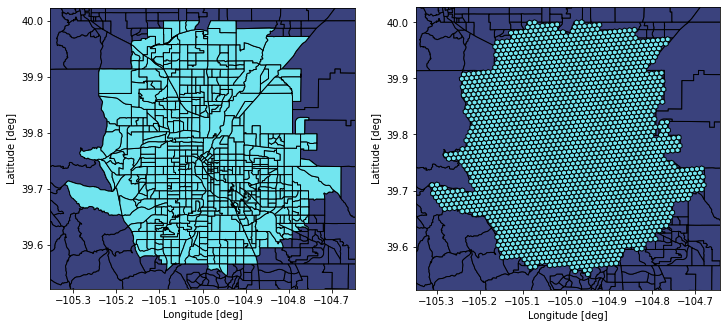

In [28]:
#Plot showing census tracks and H3 Hex
deep_reload(src)
fig=src.figures.TractsHexComparisonPlot(gdf_selected,gdf_hex_8,gdf_background)

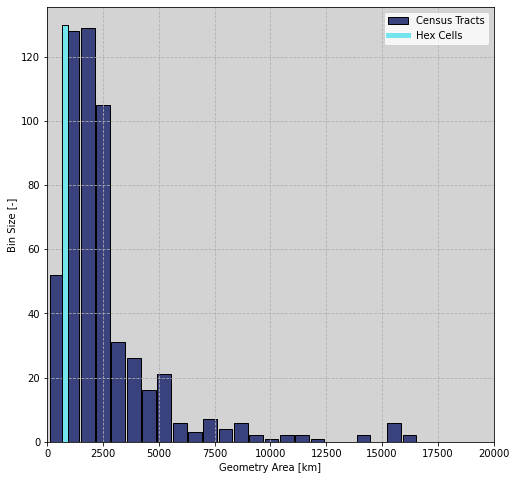

In [9]:
#Comparing sizes of tracts to hex cells
deep_reload(src)
fig=src.figures.TractsHexAreaHistogram(gdf_selected,gdf_hex_8)

In [12]:
gdf_selected

,index,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME_ho,NAMELSAD,STUSPS,NAMELSADCO,...,tract_mi,FIPS_mi,NAME,Median Income,state,county,tract,FIPS,centroid_x,centroid_y
0,0,08,001,007801,1400000US08001007801,08001007801,78.01,Census Tract 78.01,CO,Adams County,...,7801,08001007801,Colorado,37702,8,1,7801,08001007801,-104.875253,39.741994
1,1,08,001,007802,1400000US08001007802,08001007802,78.02,Census Tract 78.02,CO,Adams County,...,7802,08001007802,Colorado,46096,8,1,7802,08001007802,-104.856440,39.741995
2,2,08,001,007900,1400000US08001007900,08001007900,79,Census Tract 79,CO,Adams County,...,7900,08001007900,Colorado,52952,8,1,7900,08001007900,-104.873827,39.748897
3,3,08,001,008000,1400000US08001008000,08001008000,80,Census Tract 80,CO,Adams County,...,8000,08001008000,Colorado,60447,8,1,8000,08001008000,-104.856411,39.749255
4,4,08,001,008100,1400000US08001008100,08001008100,81,Census Tract 81,CO,Adams County,...,8100,08001008100,Colorado,51034,8,1,8100,08001008100,-104.836954,39.747007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,1040,08,059,060501,1400000US08059060501,08059060501,605.01,Census Tract 605.01,CO,Jefferson County,...,60501,08059060501,Colorado,148533,8,59,60501,08059060501,-105.148009,39.880924
557,1041,08,059,980000,1400000US08059980000,08059980000,9800,Census Tract 9800,CO,Jefferson County,...,980000,08059980000,Colorado,0,8,59,980000,08059980000,-105.120300,39.718133
558,1042,08,059,980400,1400000US08059980400,08059980400,9804,Census Tract 9804,CO,Jefferson County,...,980400,08059980400,Colorado,0,8,59,980400,08059980400,-105.103321,39.641687
559,1043,08,059,980700,1400000US08059980700,08059980700,9807,Census Tract 9807,CO,Jefferson County,...,980700,08059980700,Colorado,0,8,59,980700,08059980700,-105.202886,39.892495


In [17]:
gdf_selected['Owned']

0      176
1      288
2      576
3      519
4       86
      ... 
556    746
557     13
558     13
559     13
560     13
Name: Owned, Length: 561, dtype: object

In [18]:
gdf_selected['Total_ra']

0       838
1       982
2      1146
3      1124
4       248
       ... 
556    1099
557      26
558      26
559      26
560      34
Name: Total_ra, Length: 561, dtype: int64

In [19]:
#Converting demographic data to H3 cells for calculations
deep_reload(src)
gdf_hex_data=src.h3_hex.DataToHex(gdf_selected,gdf_hex_8,data_keys=['Total_ra'])

['Total_ra']


In [59]:
gdf_selected.keys()

Index(['index', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'AFFGEOID',
       'GEOID', 'NAME_ho', 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'geometry',
       'FIPS_ho', 'Total_ra', 'Owned', '1 Owned', '2 to 4 Owned', '5+ Owned',
       'Mobile Home Owned', 'Other Owned', 'Rented', '1 Rented',
       '2 to 4 Rented', '5+ Rented', 'Mobile Home Rented', 'Other Rented',
       'GEO_ID_ra', 'NAME_ra', 'state_ra', 'county_ra', 'tract_ra', 'FIPS_ra',
       'Total', 'White alone', 'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races',
       'Two races including Some other race',
       'Two races excluding Some other race and three or more races', 'GEO_ID',
       'NAME_mi', 'state_mi', 'county_mi', 'tract_mi', 'FIPS_mi', 'NAME',
       'Median Income', 'state', 'county', 'tract', 'FIPS', 'centroid_x',
       'centroid_y'],
      dtype=

In [22]:
gdf_selected['GEOID']

0      08001007801
1      08001007802
2      08001007900
3      08001008000
4      08001008100
          ...     
556    08059060501
557    08059980000
558    08059980400
559    08059980700
560    08059980800
Name: GEOID, Length: 561, dtype: object

In [24]:
gdf_selected=gdf_selected[['FIPS','geometry','Owned', '1 Owned', '2 to 4 Owned', '5+ Owned',
        'Mobile Home Owned', 'Other Owned', 'Rented', '1 Rented',
        '2 to 4 Rented', '5+ Rented', 'Mobile Home Rented', 'Other Rented',
        'White alone', 'Black or African American alone',
        'American Indian and Alaska Native alone', 'Asian alone',
        'Native Hawaiian and Other Pacific Islander alone',
        'Some other race alone', 'Two or more races',
        'Two races including Some other race',
        'Two races excluding Some other race and three or more races',
        'Median Income']]

In [29]:
gdf_selected.dtypes

FIPS                                                             object
geometry                                                       geometry
Owned                                                            object
1 Owned                                                          object
2 to 4 Owned                                                     object
5+ Owned                                                         object
Mobile Home Owned                                                object
Other Owned                                                      object
Rented                                                           object
1 Rented                                                         object
2 to 4 Rented                                                    object
5+ Rented                                                        object
Mobile Home Rented                                               object
Other Rented                                                    

In [31]:
def ChangeDTypeToFloat(gdf,keys):
    for key in keys:
        gdf[key]=gdf[key].astype(float)
    return gdf
gdf_selected=ChangeDTypeToFloat(gdf_selected,list(gdf_selected.keys())[2:])
gdf_selected.dtypes

FIPS                                                             object
geometry                                                       geometry
Owned                                                           float64
1 Owned                                                         float64
2 to 4 Owned                                                    float64
5+ Owned                                                        float64
Mobile Home Owned                                               float64
Other Owned                                                     float64
Rented                                                          float64
1 Rented                                                        float64
2 to 4 Rented                                                   float64
5+ Rented                                                       float64
Mobile Home Rented                                              float64
Other Rented                                                    

In [44]:
gdf_selected

,FIPS,geometry,Owned,1 Owned,2 to 4 Owned,5+ Owned,Mobile Home Owned,Other Owned,Rented,1 Rented,...,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,Two races excluding Some other race and three or more races,Median Income,Total_Race
0,08001007801,"POLYGON ((-104.88465 39.74381, -104.87522 39.7...",176.0,136.0,114.0,13.0,13.0,13.0,662.0,554.0,...,428.0,53.0,438.0,9.0,237.0,404.0,408.0,50.0,37702.0,NaN
1,08001007802,"POLYGON ((-104.86580 39.74379, -104.85993 39.7...",288.0,288.0,13.0,13.0,13.0,13.0,694.0,307.0,...,298.0,120.0,272.0,74.0,373.0,806.0,800.0,101.0,46096.0,NaN
2,08001007900,"POLYGON ((-104.88466 39.74747, -104.88014 39.7...",576.0,576.0,18.0,18.0,18.0,18.0,570.0,398.0,...,404.0,26.0,193.0,16.0,346.0,331.0,284.0,238.0,52952.0,NaN
3,08001008000,"POLYGON ((-104.86592 39.75474, -104.85404 39.7...",519.0,519.0,18.0,18.0,18.0,18.0,605.0,637.0,...,211.0,120.0,130.0,18.0,530.0,359.0,325.0,148.0,60447.0,NaN
4,08001008100,"POLYGON ((-104.84706 39.74378, -104.84704 39.7...",86.0,13.0,13.0,13.0,86.0,13.0,162.0,21.0,...,34.0,158.0,93.0,13.0,73.0,91.0,83.0,52.0,51034.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,08059060501,"MULTIPOLYGON (((-105.14712 39.91389, -105.1405...",746.0,762.0,59.0,58.0,117.0,18.0,353.0,212.0,...,19.0,46.0,102.0,27.0,268.0,416.0,370.0,152.0,148533.0,NaN
557,08059980000,"POLYGON ((-105.13115 39.72481, -105.13057 39.7...",13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,...,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,0.0,NaN
558,08059980400,"POLYGON ((-105.10975 39.64572, -105.10935 39.6...",13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,...,47.0,94.0,46.0,13.0,58.0,13.0,13.0,13.0,0.0,NaN
559,08059980700,"POLYGON ((-105.24111 39.90641, -105.24091 39.9...",13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,...,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,0.0,NaN


In [52]:
gdf_selected['Total_Race']=gdf_selected[[
    'White alone', 'Black or African American alone',
    'American Indian and Alaska Native alone', 'Asian alone',
    'Native Hawaiian and Other Pacific Islander alone',
    'Some other race alone', 'Two or more races']].sum(axis=1)
gdf_selected['Total_Race']

0      1862.0
1      2224.0
2      1891.0
3      1852.0
4       640.0
        ...  
556    1642.0
557      91.0
558     535.0
559      91.0
560      99.0
Name: Total_Race, Length: 561, dtype: float64

In [53]:
gdf_selected['Total_Race'].sum()

683764.0

In [55]:
gdf_selected['Total_HO']=gdf_selected[[
    'Owned','Rented']].sum(axis=1)
gdf_selected['Total_HO'],gdf_selected['Total_HO'].sum()

(0       838.0
 1       982.0
 2      1146.0
 3      1124.0
 4       248.0
         ...  
 556    1099.0
 557      26.0
 558      26.0
 559      26.0
 560      34.0
 Name: Total_HO, Length: 561, dtype: float64,
 497307.0)